In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

map_path = os.path.expanduser(
        '../maps/map-1.txt'
)
mp = []
with open(map_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        l = []
        for i in range(len(line)):
            l.append(line[i])
        mp.append(l)

mp = np.array(mp)


def visualize_map(mp: np.ndarray):
    char_to_int = {
        '#': 1.,
        '*': 1.,
        '.': 0.,
        'A': 0.,
        'B': 0.,
    }
    cp = np.zeros(mp.shape, dtype=np.float32)
    m, n = cp.shape
    for i in range(m):
        for j in range(n):
            cp[i, j] = char_to_int[mp[i, j]]
    return cp


In [24]:
def bfs_grid(mp: np.ndarray, start_x, start_y, threshold):
    dx = [-1, 1, 0, 0]
    dy = [0, 0, -1, 1]
    m, n = mp.shape
    queue = [(start_x, start_y)]
    visited = set()
    visited.add((start_x, start_y))
    depth = 0
    grids = []
    while l := len(queue) > 0:
        for i in range(l):
            x, y = queue.pop(0)
            for i in range(4):
                next_pos = (x + dx[i], y + dy[i])
                if not (0 <= next_pos[0] < m and 0 <= next_pos[1] < n): continue
                if not next_pos in visited and mp[next_pos] == '.':
                    queue.append(next_pos)
                    visited.add(next_pos)
                    if random.randint(0, 1000) < threshold:
                        grids.append(next_pos)
        depth += 1
    return grids

(-0.5, 199.5, 199.5, -0.5)

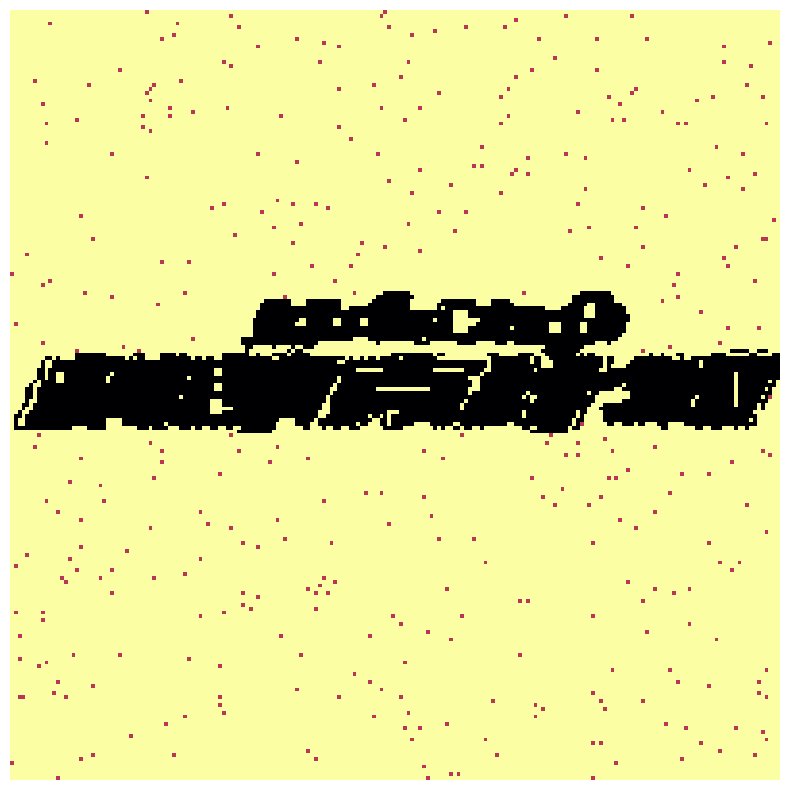

In [25]:
plt.figure(figsize=(10,10))
cp = visualize_map(mp)

grid = bfs_grid(mp, 50, 60, 10)
for x, y in grid:
    cp[x, y] = 0.5
plt.imshow(cp, cmap='inferno_r')
plt.axis('off')